![Imgur](https://i.imgur.com/xGrPcvZ.jpg)

**Image Credits:** T5 (Twitter: @thornsdance, pixiv ID：4819066)

# About this notebook

This is an exercise about cleaning and extracting data from a dataset using Pandas library from Python.

BY: Jorge S. Ruiz

## Libraries

In [3]:
# Libraries:

import pandas as pd
import matplotlib.pyplot as plt
plt.close('all')
import re



## Read Data & Options

In [4]:
# Importing our dataset from a csv file.
booklist = pd.read_csv('books.csv') # Optional encoding: , encoding = 'ISO-8859-1' or encoding = 'UTF-8'

type(booklist)

# Setting display max rows
pd.options.display.max_rows = 10

# Our Dataset
print(booklist)


       bookID                                              title  \
0           1  Harry Potter and the Half-Blood Prince (Harry ...   
1           2  Harry Potter and the Order of the Phoenix (Har...   
2           4  Harry Potter and the Chamber of Secrets (Harry...   
3           5  Harry Potter and the Prisoner of Azkaban (Harr...   
4           8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...       ...                                                ...   
11122   45631   Expelled from Eden: A William T. Vollmann Reader   
11123   45633                        You Bright and Risen Angels   
11124   45634                    The Ice-Shirt (Seven Dreams #1)   
11125   45639                                        Poor People   
11126   45641                        Las aventuras de Tom Sawyer   

                                                 authors average_rating  \
0                             J.K. Rowling/Mary GrandPré           4.57   
1                             J.K

## Data cleanup

In [5]:
# The original dataframe
df_raw = booklist 


# Creating a dataframe with all incorrect rows,(using as a filter an int column)
df_baka = df_raw[~df_raw.average_rating.str.contains(r'[0-9]')]



# Droping rows that are in the trash dataframe (df_baka)
df_clean = df_raw.drop(df_raw.index[df_baka.index])

# (BL = Book List)
BL = df_clean

print(BL)

       bookID                                              title  \
0           1  Harry Potter and the Half-Blood Prince (Harry ...   
1           2  Harry Potter and the Order of the Phoenix (Har...   
2           4  Harry Potter and the Chamber of Secrets (Harry...   
3           5  Harry Potter and the Prisoner of Azkaban (Harr...   
4           8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...       ...                                                ...   
11122   45631   Expelled from Eden: A William T. Vollmann Reader   
11123   45633                        You Bright and Risen Angels   
11124   45634                    The Ice-Shirt (Seven Dreams #1)   
11125   45639                                        Poor People   
11126   45641                        Las aventuras de Tom Sawyer   

                                                 authors average_rating  \
0                             J.K. Rowling/Mary GrandPré           4.57   
1                             J.K

## Text reviews
**Booklist order by number of text reviews**

                                              title  text_reviews_count
10340                       Twilight (Twilight  #1)               94265
5272                                 The Book Thief               86881
1069                      The Giver (The Giver  #1)               56604
284                                   The Alchemist               55843
10704                           Water for Elephants               52759
...                                             ...                 ...
4513                   The Custard Kid (Black Cats)                   0
5567                                   West To Eden                   0
5566   The Penguin Companion to European Literature                   0
6644                       Danny  Champion Du Monde                   0
830                              New Media Language                   0

[11124 rows x 2 columns]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


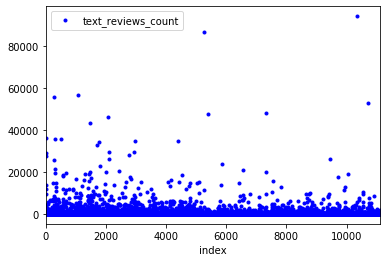

In [12]:
# books titles order by number of text reviews 
print(BL[['title','text_reviews_count']].sort_values(by=['text_reviews_count'], ascending = False))

# Another way to find the same result
max_reviews = BL['text_reviews_count'].max()

# Find the row with max reviews
BL[booklist['text_reviews_count'] == max_reviews]

# Plotting text_reviews_counts
BL['index'] = pd.Series(list(range(len(BL))))

BL.plot(x='index', y='text_reviews_count', style='b.')

## Books score
**Booklist order by rating score**

                                                   title  ratings_count
10340                            Twilight (Twilight  #1)        4597666
1697                 The Hobbit  or There and Back Again        2530894
1462                              The Catcher in the Rye        2457092
307                 Angels & Demons (Robert Langdon  #1)        2418736
3      Harry Potter and the Prisoner of Azkaban (Harr...        2339585
...                                                  ...            ...
9202                            Horizontal Gene Transfer              0
4214   It's Only a Movie  Ingrid: Encounters on and O...              0
7212                                 Secretos De Familia              0
7754   A Farewell to Arms?: Beyond the Good Friday Ag...              0
10266         Bill Gates: Computer Legend (Famous Lives)              0

[11124 rows x 2 columns]


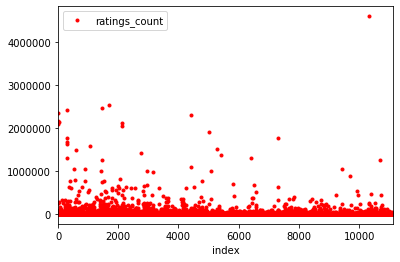

In [9]:
# books titles order by number of text reviews 
print(BL[['title','ratings_count']].sort_values(by=['ratings_count'], ascending = False))

# Another way to find the same result
max_reviews = BL['ratings_count'].max()

# Find the row with max reviews
BL[BL['ratings_count'] == max_reviews]

# Plotting total rating score
BL.plot(x='index', y='ratings_count', style='r.')

## Book score Top (average rating)

**Top 5 books with the best average rating**

                                                   title   max_rank
5272                                      The Book Thief  379669.97
10340                            Twilight (Twilight  #1)  338411.35
1069                           The Giver (The Giver  #1)  233774.52
10704                                Water for Elephants  215784.31
284                                        The Alchemist  215553.98
...                                                  ...        ...
8717               Richard Matheson's Hell House  Book 2       0.00
9251     Magical Creatures (Easy To Read! Easy To Draw!)       0.00
8214                 Adventures of the Scarlet Pimpernel       0.00
10446  After Collapse: The Regeneration of Complex So...       0.00
4922                Post Captain (Aubrey/Maturin Book 2)       0.00

[11124 rows x 2 columns]


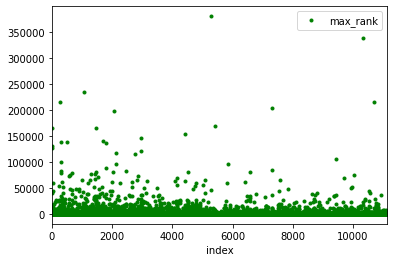

In [13]:
# Books titles order by number of text reviews 


BL['text_reviews_count'] = BL['text_reviews_count'].astype(float)
BL['average_rating'] = BL['average_rating'].astype(float)

BL['max_rank'] =  (BL['average_rating'])*(BL['text_reviews_count'])
#print(df[['title','max_rank']].sort_values(by=['max_rank'], ascending = False))

BL['max_rank']


print(BL[['title','max_rank']].sort_values(by=['max_rank'], ascending = False))

# Plotting total rating score
BL.plot(x='index', y='max_rank', style='g.')